### Names: Jared Miner and Jimmy Pronchick
### Instructor: Brian King
### Semester: CSCI 349 - Spring 2023

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In our project, we will be examining trends in common Major League Baseball statistics across time using the dataset found at https://www.kaggle.com/datasets/joyshil0599/mlb-hitting-and-pitching-stats-through-the-years?resource=download. This dataset covers seasons from the late 1800s through 2022. In particular, we will be examining how recent trends in important measurements such as batting average, OBP, SLG, OPS, ERA, and WHIP may be affected by the new rule changes implemented this year in MLB, such as the addition of a pitch clock, wider bases, and a ban on shifts, which were all designed to speed up the game, and increase hits and stolen bases. 

In [3]:
df_hitting = pd.read_csv("../data/baseball_hitting.csv")

In [4]:
df_pitching = pd.read_csv("../data/baseball_pitcher.csv")

In [5]:
df_hitting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            2500 non-null   object 
 1   position               2500 non-null   object 
 2   Games                  2500 non-null   float64
 3   At-bat                 2500 non-null   float64
 4   Runs                   2500 non-null   float64
 5   Hits                   2500 non-null   float64
 6   Double (2B)            2500 non-null   float64
 7   third baseman          2500 non-null   float64
 8   home run               2500 non-null   float64
 9   run batted in          2500 non-null   float64
 10  a walk                 2500 non-null   float64
 11  Strikeouts             2500 non-null   object 
 12  stolen base            2500 non-null   float64
 13  Caught stealing        2500 non-null   object 
 14  AVG                    2500 non-null   float64
 15  On-b

In [6]:
df_pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         2575 non-null   object 
 1   Position            2575 non-null   object 
 2   Win                 2575 non-null   float64
 3   Loss                2575 non-null   float64
 4   Earned run Average  2575 non-null   float64
 5   Games played        2575 non-null   float64
 6   Games Started       2575 non-null   float64
 7   Complete Game       2575 non-null   float64
 8   Shutout             2575 non-null   float64
 9   Save                2575 non-null   float64
 10  Save Opportunity    2575 non-null   object 
 11  Innings pitched     2575 non-null   float64
 12  hit                 2575 non-null   float64
 13  run                 2575 non-null   float64
 14  earned run          2575 non-null   float64
 15  home run            2575 non-null   float64
 16   Hit B

In [7]:
df_hitting.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930


In [8]:
df_pitching.head()

,Player name,Position,Win,Loss,Earned run Average,Games played,Games Started,Complete Game,Shutout,Save,...,Innings pitched,hit,run,earned run,home run,Hit Batsmen,base on balls,Strikeouts,WHIP,AVG
0,N Ryan,P,324.0,292.0,3.19,807.0,773.0,222.0,61.0,3.0,...,5386.0,3923.0,2178.0,1911.0,321.0,158.0,2795.0,5714.0,1.25,0.204
1,R Johnson,P,303.0,166.0,3.29,618.0,603.0,100.0,37.0,2.0,...,4135.1,3346.0,1703.0,1513.0,411.0,190.0,1497.0,4875.0,1.17,0.221
2,R Clemens,P,354.0,184.0,3.12,709.0,707.0,118.0,46.0,0.0,...,4916.2,4185.0,1885.0,1707.0,363.0,159.0,1580.0,4672.0,1.17,0.229
3,S Carlton,P,329.0,244.0,3.22,741.0,709.0,254.0,55.0,2.0,...,5217.1,4672.0,2130.0,1864.0,414.0,53.0,1833.0,4136.0,1.25,0.24
4,B Blyleven,P,287.0,250.0,3.31,692.0,685.0,242.0,60.0,0.0,...,4970.0,4632.0,2029.0,1830.0,430.0,155.0,1322.0,3701.0,1.20,0.248


In [9]:
# Downcast float cols

float_cols_hitting = df_hitting.select_dtypes('float').columns

df_hitting[float_cols_hitting] = df_hitting[float_cols_hitting].apply(pd.to_numeric, downcast = "float")


In [10]:
# Downcast float cols
float_cols_pitching = df_pitching.select_dtypes('float').columns
df_pitching[float_cols_pitching] = df_pitching[float_cols_pitching].apply(pd.to_numeric, downcast = "float")

In [11]:
# Convert cells with -- entries to nan values

df_hitting = df_hitting.replace("--", None)
df_pitching = df_pitching.replace("--", None)

In [12]:
# count nan values
nan_count_hitting = df_hitting.isna().sum()
nan_count_pitching = df_pitching.isna().sum()

In [13]:
nan_count_hitting

Player name                8
position                   8
Games                      8
At-bat                     8
Runs                       8
Hits                       8
Double (2B)                8
third baseman              8
home run                   8
run batted in              8
a walk                     8
Strikeouts                20
stolen base                8
Caught stealing          200
AVG                        8
On-base Percentage         8
Slugging Percentage        8
On-base Plus Slugging     20
dtype: int64

In [14]:
nan_count_pitching

Player name             2
Position                2
Win                     2
Loss                    2
Earned run Average      2
Games played            2
Games Started           2
Complete Game           2
Shutout                 2
Save                    2
Save Opportunity      831
Innings pitched         2
hit                     2
run                     2
earned run              2
home run                2
 Hit Batsmen            2
base on balls          12
Strikeouts              2
WHIP                    2
AVG                    12
dtype: int64

In [15]:
# count num of missing rows

num_missing_rows_hitting = len(df_hitting) - len(df_hitting.dropna())

In [16]:
num_missing_rows_pitching = len(df_pitching) - len(df_pitching.dropna())

In [17]:
# Drop rows with any nan values

df_hitting = df_hitting.dropna()

In [18]:
df_pitching = df_pitching.dropna()

In [19]:
# Rename columns to make them easier to reference
df_hitting["Name"] = df_hitting["Player name"]
df_hitting["Pos"] = df_hitting["position"]
df_hitting["GP"] = df_hitting["Games"]
df_hitting["AB"] = df_hitting["At-bat"]
df_hitting["R"] = df_hitting["Runs"]
df_hitting["H"] = df_hitting["Hits"]
df_hitting["2B"] = df_hitting["Double (2B)"]
df_hitting["3B"] = df_hitting["third baseman"]
df_hitting["HR"] = df_hitting["home run"]
df_hitting["RBI"] = df_hitting["run batted in"]
df_hitting["BB"] = df_hitting["a walk"]
df_hitting["K"] = df_hitting["Strikeouts"]
df_hitting["SB"] = df_hitting["stolen base "]
df_hitting["CS"] = df_hitting["Caught stealing"]
df_hitting["OBP"] = df_hitting["On-base Percentage"]
df_hitting["SLG"] = df_hitting["Slugging Percentage"]
df_hitting["OPS"] = df_hitting['On-base Plus Slugging']

df_hitting = df_hitting.drop(columns = ['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'])


In [20]:
# Set index as player name

#df_hitting = df_hitting.set_index(df_hitting.loc[:,"Name"])
df_hitting = df_hitting.set_index("Name")

In [21]:
# Rename columns to make them easier to reference
df_pitching["Name"] = df_pitching["Player name"]
df_pitching["Pos"] = df_pitching["Position"]
df_pitching["GP"] = df_pitching["Games played"]
df_pitching["W"] = df_pitching["Win"]
df_pitching["L"] = df_pitching["Loss"]
df_pitching["ERA"] = df_pitching["Earned run Average"]
df_pitching["GS"] = df_pitching["Games Started"]
df_pitching["CG"] = df_pitching["Complete Game"]
df_pitching["STO"] = df_pitching["Shutout"]
df_pitching["SV"] = df_pitching["Save"]
df_pitching["SVO"] = df_pitching["Save Opportunity"]
df_pitching["IP"] = df_pitching["Innings pitched"]
df_pitching["H"] = df_pitching["hit"]
df_pitching["R"] = df_pitching["run"]
df_pitching["ER"] = df_pitching["earned run"]
df_pitching["HR"] = df_pitching["home run"]
df_pitching["HBP"] = df_pitching[" Hit Batsmen"]
df_pitching["BB"] = df_pitching['base on balls']
df_pitching["K"] = df_pitching['Strikeouts']

df_pitching = df_pitching.drop(columns = ['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts'])


In [22]:
# Set index as player name

#df_pitching = df_pitching.set_index(df_pitching.loc[:,"Name"])
df_pitching = df_pitching.set_index("Name")

In [23]:
df_hitting.index.unique()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2184)

In [24]:
df_hitting.index

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'C Dickerson', 'E Wynn', 'J Smith', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2296)

In [25]:
df_hitting.index.drop_duplicates()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2184)

In [26]:
df_pitching.index.unique()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1698)

In [27]:
df_pitching.index

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Santiago', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1746)

In [28]:
df_pitching.index.drop_duplicates()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1698)

<Axes: >

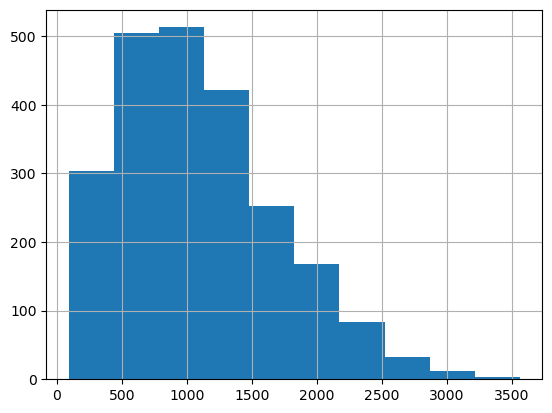

In [29]:
df_hitting["GP"].hist()


In [30]:
df_hitting["GP"].max()


3562.0

In [31]:
df_hitting["GP"].min()


92.0

In [32]:
df_hitting["GP"].mean()


1098.3833

C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\720701856.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hitting.corr(),


<Axes: >

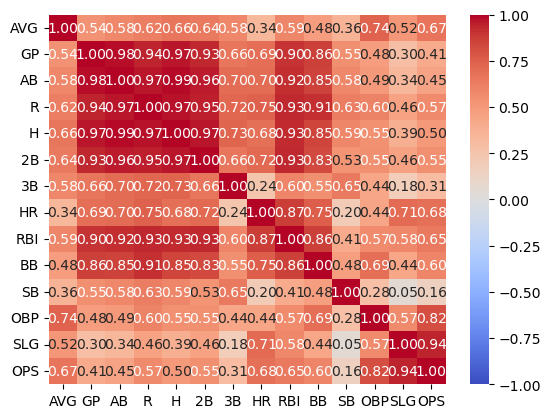

In [33]:
# Heatmap for correlation of hitting var's

sns.heatmap(df_hitting.corr(),
 center=0, vmin=-1, vmax=1, cmap="coolwarm",
 annot=True, fmt=".2f")

<Axes: xlabel='AVG', ylabel='HR'>

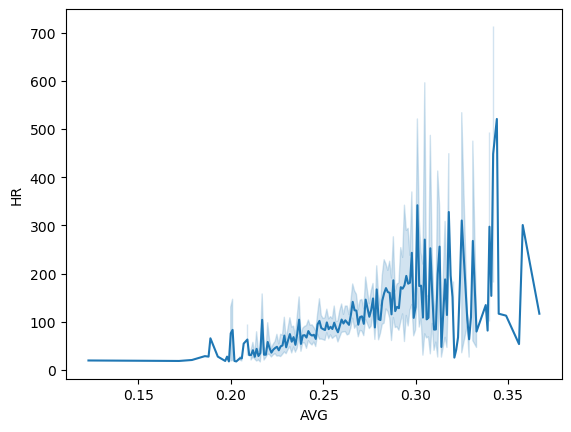

In [34]:
# Lineplot comparing AVG with HR
sns.lineplot(x = df_hitting.AVG, y = df_hitting.HR)

<Axes: >

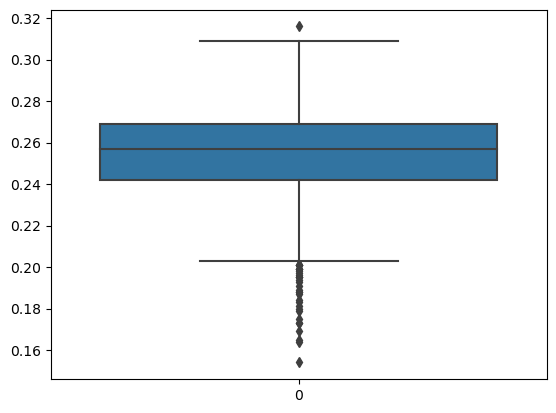

In [35]:
sns.boxplot(df_pitching.AVG)

For the modeling part of the project, I think that it will be most helpful to use clustering techniques to try to group similar players together, which may more easily show trends in the data. Some basic machine learning methods, such as k-means classification, may also be helpful.

Our overarching aim of the project, besides just finding interesting trends in a large baseball dataset, is to try to find useful trends to be able to predict how rule changes will affect future MLB seasons.

C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\2025397984.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(df_hitting.groupby(by='Pos').mean().loc[:,"2B"])
C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\2025397984.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(df_hitting.groupby(by='Pos').mean().loc[:,"3B"])
C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\2025397984.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

Text(0.5, 1.0, 'Mean Hitting Stats by Position')

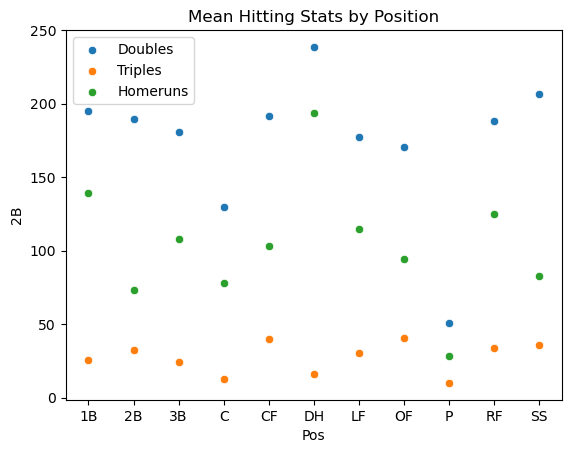

In [36]:
sns.scatterplot(df_hitting.groupby(by='Pos').mean().loc[:,"2B"])
sns.scatterplot(df_hitting.groupby(by='Pos').mean().loc[:,"3B"])
sns.scatterplot(df_hitting.groupby(by='Pos').mean().loc[:,"HR"])
plt.legend(["Doubles","Triples","Homeruns"])
plt.title("Mean Hitting Stats by Position")

C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\3975623678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x=df_hitting.Pos.unique(),y=df_hitting.groupby(by='Pos').mean().loc[:,"H"])


Text(0.5, 1.0, 'Mean Number of Hits by Position')

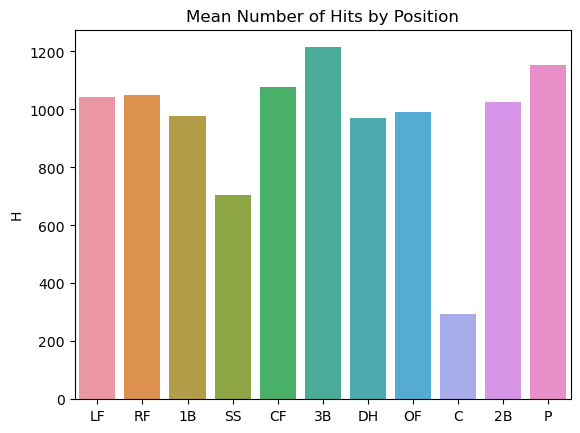

In [37]:
sns.barplot(x=df_hitting.Pos.unique(),y=df_hitting.groupby(by='Pos').mean().loc[:,"H"])
plt.title("Mean Number of Hits by Position")

In [38]:
df_hitting.groupby(by='Pos').mean()

C:\Users\jpron\AppData\Local\Temp\ipykernel_12948\1294507339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hitting.groupby(by='Pos').mean()


,AVG,GP,AB,R,H,2B,3B,HR,RBI,BB,SB,OBP,SLG,OPS
Pos,,,,,,,,,,,,,,
1B,0.266567,1130.803711,3785.370605,530.158875,1044.158936,195.171341,25.557632,138.937698,582.323975,432.059204,37.794392,0.340735,0.437321,0.778056
2B,0.261769,1136.565796,3885.187256,535.760986,1048.649414,189.649399,32.501991,73.330681,433.274902,368.561768,94.330681,0.327155,0.384733,0.711888
3B,0.260383,1088.448242,3656.229980,488.164764,975.770142,180.452103,24.126436,108.091957,492.563232,365.812256,44.720306,0.327521,0.409728,0.737249
C,0.247729,896.897217,2757.579346,313.102814,704.426819,129.498444,12.451714,78.046730,361.224304,273.604370,15.750779,0.317988,0.387925,0.705913
CF,0.264081,1172.845581,3943.979736,585.422791,1078.634155,191.593491,39.650406,103.333336,481.569092,388.329254,124.918701,0.331687,0.409959,0.741646
DH,0.269971,1287.714233,4360.971191,634.857117,1214.457153,238.628571,16.228571,193.485718,710.285706,537.485718,47.428570,0.350029,0.459800,0.809829
LF,0.268013,1066.973755,3519.839355,511.678680,971.691833,177.495087,30.416393,115.016396,494.416382,369.167206,80.357376,0.337846,0.430721,0.768567
OF,0.266403,1076.089600,3579.552246,507.850739,992.552246,170.238800,40.283581,94.253731,476.149261,359.223877,72.432838,0.333328,0.414672,0.748000
P,0.210182,626.090881,1325.636353,137.727280,293.272736,50.636364,10.000000,28.181818,149.545456,86.727272,7.636364,0.265273,0.332818,0.598091


<Axes: xlabel='ERA', ylabel='L'>

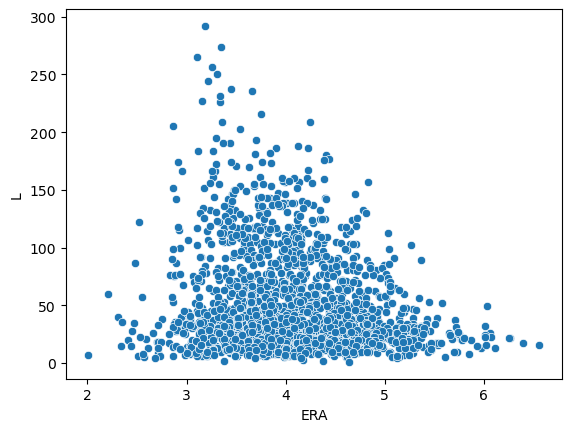

In [39]:
sns.scatterplot(x=df_pitching.ERA,y=df_pitching.L)

Text(0, 0.5, 'Win Percentage')

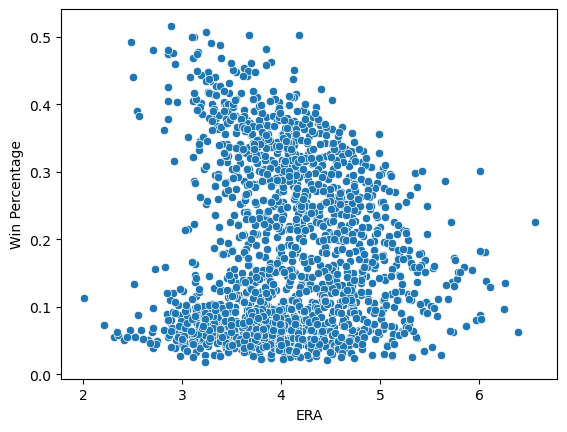

In [40]:
sns.scatterplot(x=df_pitching.ERA,y=df_pitching.W/df_pitching.GP)
plt.ylabel("Win Percentage")

Text(0, 0.5, 'Loss Percentage')

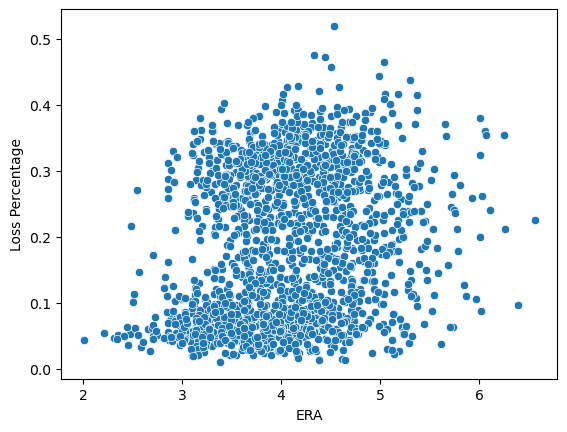

In [41]:
sns.scatterplot(x=df_pitching.ERA,y=df_pitching.L/df_pitching.GP)
plt.ylabel("Loss Percentage")

<Axes: xlabel='IP', ylabel='GP'>

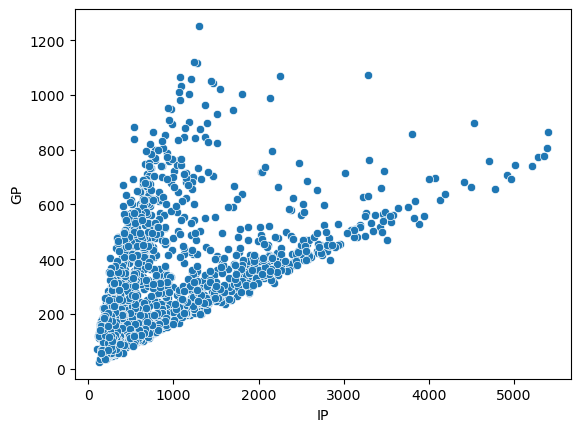

In [42]:
sns.scatterplot(x=(df_pitching.IP),y=df_pitching.GP)

<Axes: xlabel='ERA', ylabel='CG'>

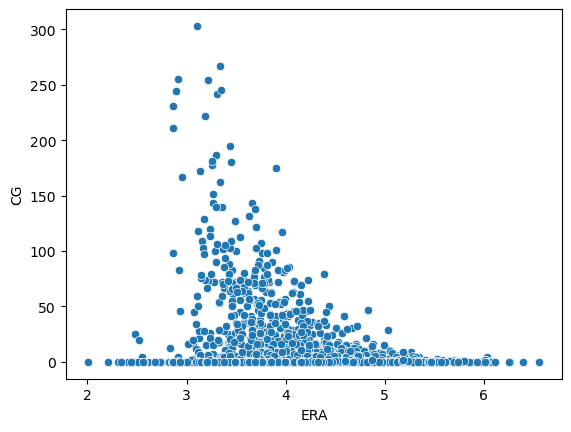

In [43]:
sns.scatterplot(y=df_pitching.CG,x=df_pitching.ERA)

<Axes: xlabel='ERA', ylabel='IP'>

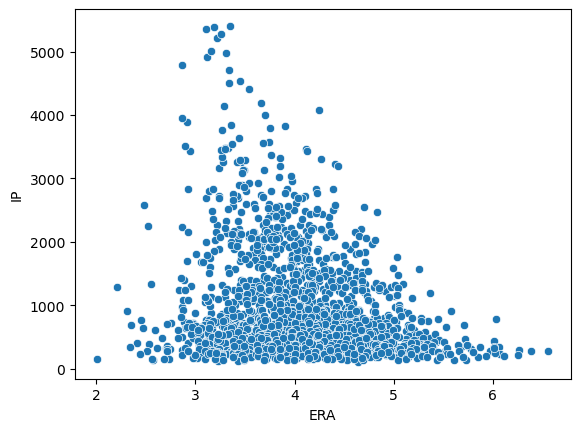

In [44]:
sns.scatterplot(y=df_pitching.IP,x=df_pitching.ERA)

In [45]:
df_hitting[df_hitting.Pos=='P']

,AVG,Pos,GP,AB,R,H,2B,3B,HR,RBI,BB,K,SB,CS,OBP,SLG,OPS
Name,,,,,,,,,,,,,,,,,
J Lane,0.241,P,500.0,1211.0,165.0,292.0,64.0,7.0,61.0,189.0,123.0,258,10.0,6,0.314,0.457,0.771
B Lemon,0.232,P,615.0,1183.0,148.0,274.0,54.0,9.0,37.0,147.0,93.0,241,2.0,1,0.288,0.386,0.674
R Ruffing,0.269,P,882.0,1937.0,209.0,521.0,98.0,13.0,36.0,273.0,97.0,266,1.0,1,0.306,0.389,0.695
D Drysdale,0.186,P,547.0,1169.0,96.0,218.0,26.0,7.0,29.0,113.0,60.0,370,0.0,2,0.228,0.295,0.523
H Jeffcoat,0.248,P,918.0,1963.0,249.0,487.0,95.0,18.0,26.0,188.0,114.0,289,49.0,7,0.291,0.355,0.646
W Johnson,0.235,P,937.0,2324.0,241.0,547.0,94.0,41.0,24.0,255.0,110.0,251,13.0,4,0.274,0.342,0.616
J Harshman,0.179,P,258.0,424.0,46.0,76.0,7.0,0.0,21.0,65.0,72.0,119,0.0,0,0.294,0.344,0.638
D Trout,0.213,P,535.0,961.0,99.0,205.0,28.0,7.0,20.0,110.0,59.0,226,7.0,2,0.260,0.319,0.579
M Pappas,0.123,P,527.0,1073.0,72.0,132.0,13.0,3.0,20.0,67.0,36.0,510,1.0,0,0.157,0.197,0.354
